# Sharpe Ratio & Frontier

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Portfolio Atual

### Pegando os dados na API do Yahoo

In [2]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'PMAM3.SA',
           'FLRY3.SA', 'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA']

itau = web.DataReader(tickers[0], ds_yahoo, start, end)
abev = web.DataReader(tickers[1], ds_yahoo, start, end)
usim = web.DataReader(tickers[2], ds_yahoo, start, end)
pmam = web.DataReader(tickers[3], ds_yahoo, start, end)
flry = web.DataReader(tickers[4], ds_yahoo, start, end)
pssa = web.DataReader(tickers[5], ds_yahoo, start, end)
tiet = web.DataReader(tickers[6], ds_yahoo, start, end)
leve = web.DataReader(tickers[7], ds_yahoo, start, end)
whrl = web.DataReader(tickers[8], ds_yahoo, start, end)

## Normalizando o retorno diário de cada ativo do portfólio

In [3]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [4]:
# pesos = [0.13700082, 0.03760006, 0.0256183,  0.00517798, 0.03812574, 0.24599906, 0.32096756, 0.05552042, 0.13399005]
pesos = [.0964, .0252, .1161, .2293, .0491, .0864, .1373, .2415, .0187]

for acao_df, alocacao in zip((itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [5]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl):
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [6]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'],
                  pmam['Posicao'], flry['Posicao'], pssa['Posicao'],
                  tiet['Posicao'], leve['Posicao'], whrl['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [7]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']
portfolio_acoes.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']

## Desempenho da carteira

In [8]:
portfolio_posicao.head()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET,LEVE,WHRL
Date,,,,,,,,,
2018-11-28,964.000000,252.000000,1161.000000,2293.000000,491.000000,864.000000,1373.000000,2415.000000,187.000000
2018-11-29,972.561774,251.245032,1199.744537,2293.000000,489.424110,855.358438,1407.326624,2480.836364,187.000000
2018-11-30,963.732191,255.472730,1249.177253,2293.000000,486.272376,829.913657,1407.326624,2433.952729,187.000000
2018-12-03,951.553517,252.754939,1307.961916,2308.598647,485.371893,851.357626,1434.787940,2389.064337,191.065192
2018-12-04,950.482913,251.396043,1253.185304,2246.204060,485.146727,842.716000,1414.191931,2352.155877,191.065192


In [9]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [10]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
10000.0
Investimento final:
11249.88


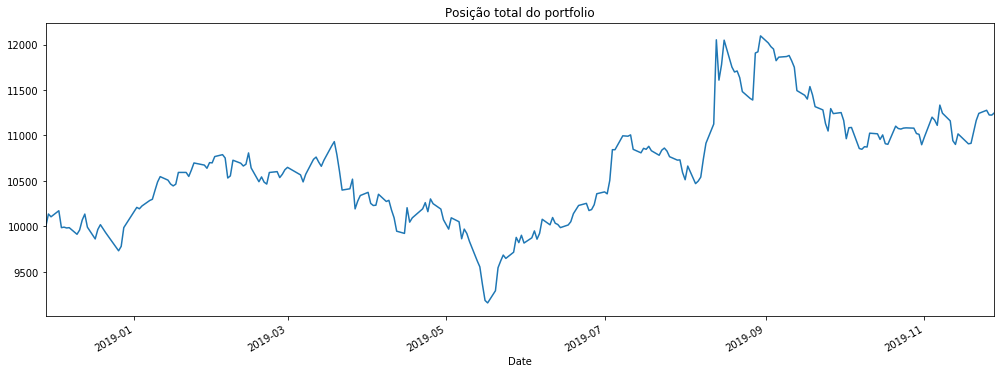

In [57]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

plt.show()

In [55]:
print(img.get_figure().get_url)

<bound method Artist.get_url of <Figure size 1224x432 with 1 Axes>>


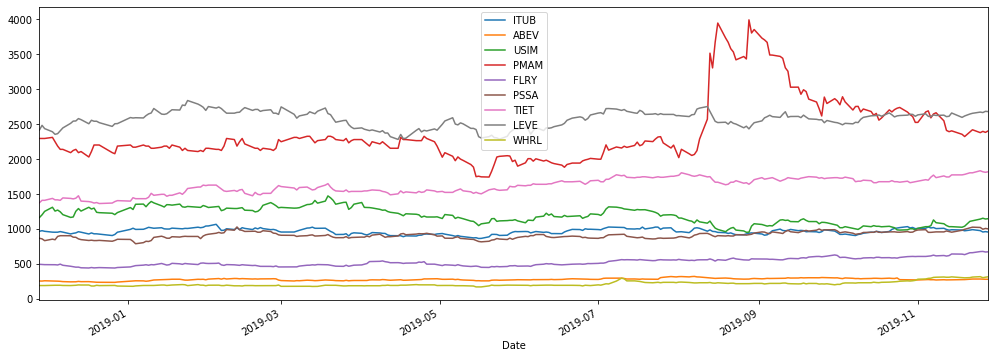

In [12]:
portfolio_acoes.plot(figsize=(17,6));

## Desempenho da Carteira Normalizada

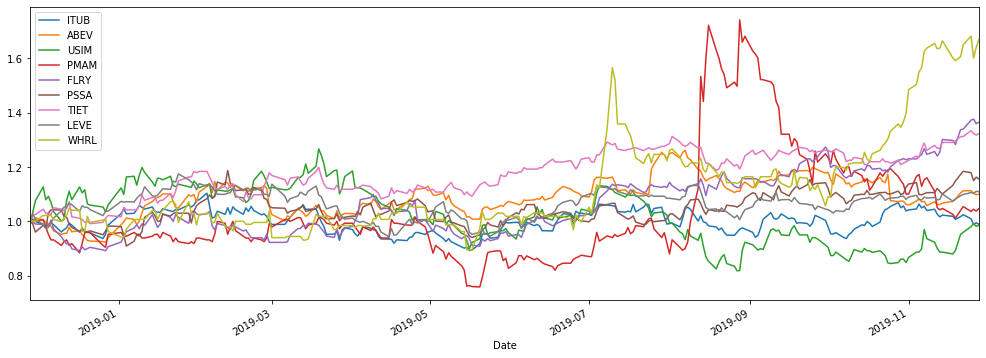

In [13]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Retorno diário da carteira

In [14]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [15]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média 0.05% diariamente


In [16]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.012146964602617733

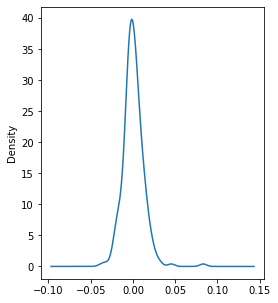

In [17]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [18]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {}%'.format(round_ret))

Essa carteira rendeu 12.499%


In [19]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

0.04508790211268643

In [20]:
sharpe_ratio_ano = (len(itau) ** 0.5) * sharpe_ratio
sharpe_ratio_ano

0.7114750946546724

## Retorno diário

In [21]:
retorno_diario = portfolio_acoes.pct_change(1)

## Gerando um único portfólio com posição atual

In [22]:
print("Ativos")
print(portfolio_acoes.columns)
print("")

#pesos = [0.07726219, 0.02625088, 0.0257171,  0.23334266, 0.02189218, 0.23685795, 0.30408544, 0.01463493, 0.05995667]

# Gerando pesos aleatórios
print("Pesos Atuais")
print(pesos)
print("")

# Rebalanceando os pesos
print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)
print("")

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_diario.mean() * pesos) * len(itau) )
print(ret_esp)
print("")

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * len(itau), pesos ) ) )
print(vol_esp)
print("")

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = (ret_esp - 0.06) / vol_esp
print(sharpe)


Ativos
Index(['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL'], dtype='object')

Pesos Atuais
[0.0964, 0.0252, 0.1161, 0.2293, 0.0491, 0.0864, 0.1373, 0.2415, 0.0187]

Rebalancear os pesos
[0.0964 0.0252 0.1161 0.2293 0.0491 0.0864 0.1373 0.2415 0.0187]

Retorno esperado
0.17773247637207817

Volatilidade esperada
0.18921974848093162

Sharpe Ratio
0.6221997297705029


## Gerando milhares de portfólios

In [23]:
num_portfolios = 5000
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Pesos aleatórios
    pesos = np.array(np.random.random(len(tickers)))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_diario.mean() * pesos) * len(itau) )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * len(itau), pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = (ret_esp_arr[ind] - 0.06) / vol_esp_arr[ind]

print("Ativos")
print(portfolio_acoes.columns)
print("")

print("Pesos Ideais")
print(pesos_arr[sharpe_arr.argmax(),:])
print("")

print("Sharpe Ratio")
print(sharpe_arr.max())
print("")

print("Retorno Esperado")
print(ret_esp_arr[sharpe_arr.argmax()])

Ativos
Index(['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL'], dtype='object')

Pesos Ideais
[0.01723075 0.14926641 0.00183368 0.04959034 0.26712708 0.03582583
 0.19240246 0.05571794 0.23100551]

Sharpe Ratio
1.4988365002767872

Retorno Esperado
0.3403958253742655
